#### Imports and generation of Pandas DataFrame in cells below.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
year = np.arange(2012,2022,1)
quantity = [1.88e9, 2.14e9, 2.37e9, 2.51e9,2.74e9,2.61e9,2.5e9,2.58e9,2.28e9,2.55e9]
price = [6.92,4.49,3.71,3.52,3.3,3.31,3.59,3.5,4.64,5.47]
PDSI = [-3.06,0.31,2.28,2.9,3.94,2.41,2.4,5.04,-0.62,-1.21]
zipped = list(zip(year,quantity,price,PDSI))

In [4]:
df = pd.DataFrame(zipped, columns = ['Year','Quantity','Price','PDSI'])

In [5]:
df

,Year,Quantity,Price,PDSI
0,2012,1.880000e+09,6.92,-3.06
1,2013,2.140000e+09,4.49,0.31
2,2014,2.370000e+09,3.71,2.28
3,2015,2.510000e+09,3.52,2.90
4,2016,2.740000e+09,3.30,3.94
5,2017,2.610000e+09,3.31,2.41
6,2018,2.500000e+09,3.59,2.40
7,2019,2.580000e+09,3.50,5.04
8,2020,2.280000e+09,4.64,-0.62
9,2021,2.550000e+09,5.47,-1.21


## 1) Calculate Gross Product using the Quantity and Price for each year

In [6]:
#Gross product defined by (quantity * price)/2
gp = (df['Quantity']*df['Price'])/2

In [7]:
gp

0    6.504800e+09
1    4.804300e+09
2    4.396350e+09
3    4.417600e+09
4    4.521000e+09
5    4.319550e+09
6    4.487500e+09
7    4.515000e+09
8    5.289600e+09
9    6.974250e+09
dtype: float64

## 2) Create scatterplot of equilibrium quantity versus price

Text(0.5, 1.0, 'Equilibrium Quantity versus Price')

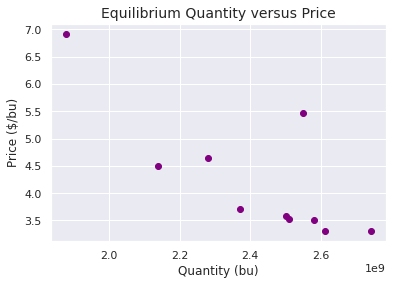

In [8]:
sb.set()
fig = plt.figure()
ax = plt.subplot(1,1,1)
ax.scatter(df['Quantity'],df['Price'], color = 'purple')
ax.set_xlabel('Quantity (bu)')
ax.set_ylabel('Price ($/bu)')
ax.set_title('Equilibrium Quantity versus Price', fontsize = 14)

## 3) Using your scatterplot, illustrate how the equilibrium quantity and price may be affected by changes in the supply curve due to (a) more favorable and (b) less favorable growing conditions for corn, assuming the demand curve for corn is fixed

##### Assuming that the demand curve is fixed, the equilibrium quantity will increase when there is a more favorable growing season. This will decrease when there is a less favorable growing season.

##### The equilibrium price will increase when there is a less favorable growing season. It will decrease when there is a more favorable growing season.

## 4) On August 10, 2020, a powerful derecho crossed Iowa. Before the derecho hit, it was projected that Iowa would harvest about 2.75 * 10^9 bushels of corn in 2020. As you can see in the table, only 2.28 * 10^9 bushels of corn were harvested, primarily because of crop losses due to the derecho. Estimate the change in gross product due to this derecho.

##### When interpolating for the projected quantity of 2.75 * 10^9 bushels, it is best to compare for the price in 2016, where a similar number of bushels (2.74*10^9) calculated a price of $3.30

##### Given the information given above, the estimated price for 2020 without the derecho will be $3.40

#### The loss in gross product due to this derecho is as follows:

In [17]:
gp_diff = ((df['Quantity'][8] * df['Price'][8])/2)-((2.75e9*3.40)/2)
print(f'The change in gross product is {gp_diff} dollars.')

The change in gross product is 614600000.0 dollars.


#### My projection predicts a gain in gross product after the derecho happened. The hypothetical price I chose is consistent with the price of 2016, although it is nudged ten cents higher in order to account for the change in PDSI. The reason that the derecho resulted in a net gain in gross product is because the increase in the price of each bushel of corn outweighed the decrease in supply. This is reflected in the calculation of gross product.

# __________________________________________________


### I have now been hired by an agricultural consulting firm (hooray!) to analyze whether dry or wet conditions have an effect on the equilibrium quantity and price of corn.

## 5) Use the PDSI index, along with your equilibrium quantities and prices, to assess how (a) wet conditions (PDSI > 2.00) and (b) dry conditions (PDSI < -2.00) affect the equilibrium quantity and price of corn, compared to normal conditions (-2.00 < PDSI < 2,00). Remember that you are looking at real data, and real data is often messy.

Text(0.5, 1.0, 'Equilibrium Quantity versus PDSI')

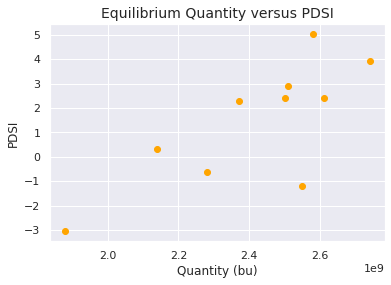

In [12]:
#Equilibrium quantity versus PDSI
sb.set()
fig = plt.figure()
ax = plt.subplot(1,1,1)
ax.scatter(df['Quantity'],df['PDSI'], color = 'orange')
ax.set_xlabel('Quantity (bu)')
ax.set_ylabel('PDSI')
ax.set_title('Equilibrium Quantity versus PDSI', fontsize = 14)

Text(0.5, 1.0, 'Equilibrium Price versus PDSI')

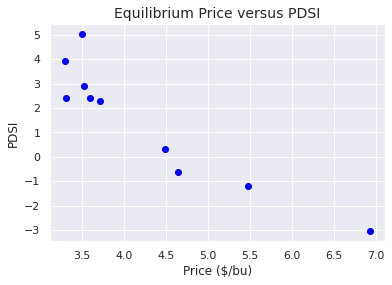

In [13]:
#Equilbrium Price versus PDSI
sb.set()
fig = plt.figure()
ax = plt.subplot(1,1,1)
ax.scatter(df['Price'],df['PDSI'], color = 'blue')
ax.set_xlabel('Price ($/bu)')
ax.set_ylabel('PDSI')
ax.set_title('Equilibrium Price versus PDSI', fontsize = 14)

#### The PDSI affects the equilibrium quantities and prices.
#### During wet conditions, the equilibrium quantity of corn generally is high. During dry conditions, the equilibrium quantity of corn is generally low.
#### During wet conditions, the price of a bushel is generally low. During dry conditions, the price of a bushel is generally much higher.

##### They should give me a raise

## 6) The firm asks you to predict the effects of a very dry (PDSI < -5.00) growing season on the equilibrium quantity and price of corn. Would you be comfortable doing so, based on the data that you have? If not, what would you need to do in order to increase your confidence in your prediction?

#### With the information that has been provided to me, I would not feel confident enough to estimate the price of corn with a PDSI below -5.00. The first reason for this is because I do not believe using a single number to define the precipitation over the course of the year is a good indication of how dry the environment actually is. Additionally, the severity of the drought can vary across the state of Iowa, which may have different land uses for particular areas. I also believe that there may be an exponential relationship between the PDSI and equilibrium quantity and price of corn, although there are too few data points for me to confirm this. With more data points, and inflation-adjusted data, I believe I would have the confidence to make an informed decision about this. The uncertainty is simply too high as it is.